In [1]:
from trajectory_generator import TrajectoryGenerator
import numpy as np
import matplotlib.pyplot as plt
# py.offline.init_notebook_mode(connected=True)

In [2]:
# Berio Code
parameters = {"dt": 0.01, 
              "t_points": np.array([[0,0], [-50, 100], [100,70], [-40, 120]]).T,
              "delta": np.array([0.3, 0.3, 0.3]), 
              "Ac": np.array([0.05, 0.05, 0.05]),
              "delta_t": np.array([0.4, 0.4, 0.4]), 
              "T": 0.3}

# Letter G
parameters = {"dt": 0.01,
              "t_points": np.array([[0,0], [-100,100], [-200,-100], [-100,-300], [0,-100], [-100,-100]]).T,
              "delta": np.array([0.4, 0.4, 0.4, 0.4, 0.4]), 
              "Ac": np.array([0.05, 0.05, 0.05, 0.05, 0.05]),
              "delta_t": np.array([0.3, 0.3, 0.3, 0.3, 0.7]), 
              "T": 0.8}

# Fig 8. Djioua08EPM
#parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]).T, "delta": np.array([-0.5, 0.5]), "Ac": np.array([0.043949, 0.1082468]), "delta_t": np.array([0, 0]), "T": 0.4}
#parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]), "delta": [-0.5, 0.5], "Ac": [0.043949, 0.1082468], "delta_t": [0, 0], "T": [0.5, 0.2]}

t_points = parameters["t_points"]
trajectory_generator = TrajectoryGenerator(**parameters)
trajectory = trajectory_generator.generate_trajectory()
maxima = trajectory_generator.extract_strokes()

print(trajectory)

print(maxima)

velocity = trajectory_generator.velocity()

[[-1.06230401e-01 -1.75779743e-01 -2.79822491e-01 -4.30016522e-01
  -6.39900436e-01 -9.24619242e-01 -1.30051482e+00 -1.78460738e+00
  -2.39400280e+00 -3.14526450e+00 -4.05378674e+00 -5.13320174e+00
  -6.39484667e+00 -7.84731059e+00 -9.49607784e+00 -1.13432835e+01
  -1.33875986e+01 -1.56242655e+01 -1.80453055e+01 -2.06399186e+01
  -2.33950820e+01 -2.62963391e+01 -2.93287435e+01 -3.24778969e+01
  -3.57309952e+01 -3.90777837e+01 -4.25113180e+01 -4.60284383e+01
  -4.96298917e+01 -5.33200673e+01 -5.71063535e+01 -6.09981641e+01
  -6.50057149e+01 -6.91386613e+01 -7.34047184e+01 -7.78083857e+01
  -8.23498887e+01 -8.70244223e+01 -9.18217497e+01 -9.67261774e+01
  -1.01716885e+02 -1.06768563e+02 -1.11852275e+02 -1.16936469e+02
  -1.21988021e+02 -1.26973248e+02 -1.31858816e+02 -1.36612483e+02
  -1.41203687e+02 -1.45603954e+02 -1.49787165e+02 -1.53729696e+02
  -1.57410467e+02 -1.60810930e+02 -1.63915007e+02 -1.66709005e+02
  -1.69181520e+02 -1.71323332e+02 -1.73127325e+02 -1.74588429e+02
  -1.75703

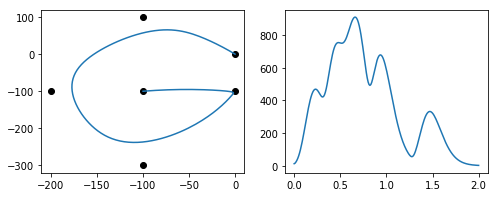

In [3]:
fig = plt.figure(figsize=(8,3))
plt.subplot(121)
plt.scatter(t_points[0,:], t_points[1,:], c='k')
plt.plot(trajectory[0,:], trajectory[1,:])
plt.subplot(122)
t = np.linspace(0, 2, trajectory.shape[1])
plt.plot(t, velocity)